# Plotting for Figure 1 and Figure 2 part (a) in the main paper

Developed by Siobhan Powell, 2021 (updated 2022). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder = '../RunningModel/Outputs/'

In [3]:
# Base profiles
load1 = pd.read_csv(folder+'UniversalHome_100p_NoTimers_WECC_20220313.csv', index_col=0)
load2 = pd.read_csv(folder+'HighHome_100p_NoTimers_WECC_20220313.csv', index_col=0)
load3 = pd.read_csv(folder+'LowHome_HighWork_100p_NoTimers_WECC_20220313.csv', index_col=0)
load4 = pd.read_csv(folder+'LowHome_LowWork_100p_NoTimers_WECC_20220313.csv', index_col=0)

In [4]:
# Weekends
load12 = pd.read_csv(folder+'UniversalHome_100p_NoTimers_weekend_WECC_20220313.csv', index_col=0)
load22 = pd.read_csv(folder+'HighHome_100p_NoTimers_weekend_WECC_20220313.csv', index_col=0)
load32 = pd.read_csv(folder+'LowHome_HighWork_100p_NoTimers_weekend_WECC_20220313.csv', index_col=0)
load42 = pd.read_csv(folder+'LowHome_LowWork_100p_NoTimers_weekend_WECC_20220313.csv', index_col=0)

In [5]:
mean_day_df = pd.read_csv('../../GridModel_GridImpact/Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')
print('Weekdays: ', len(pd.to_datetime(mean_day_df[pd.to_datetime(mean_day_df['datetime']).dt.weekday.isin([0,1,2,3,4])]['datetime']).dt.date.unique()))
print('Weekend days: ', len(pd.to_datetime(mean_day_df[pd.to_datetime(mean_day_df['datetime']).dt.weekday.isin([5, 6])]['datetime']).dt.date.unique()))


Weekdays:  261
Weekend days:  104


In [6]:
tot_demand_per_segment = (load1*261 + load12*104).sum(axis=0)*(1/60)
for key in tot_demand_per_segment.index:
    print(key, np.round(tot_demand_per_segment[key] / sum(tot_demand_per_segment), 3))

Residential L1 0.0
Residential L2 0.618
MUD L2 0.243
Workplace L2 0.107
Public L2 0.032
Public DCFC 0.0


In [7]:
tot_demand_per_segment = (load2*261 + load22*104).sum(axis=0)*(1/60)
for key in tot_demand_per_segment.index:
    print(key, np.round(tot_demand_per_segment[key] / sum(tot_demand_per_segment), 3))

Residential L1 0.0
Residential L2 0.5
MUD L2 0.082
Workplace L2 0.145
Public L2 0.271
Public DCFC 0.001


In [8]:
tot_demand_per_segment = (load3*261 + load32*104).sum(axis=0)*(1/60)
for key in tot_demand_per_segment.index:
    print(key, np.round(tot_demand_per_segment[key] / sum(tot_demand_per_segment), 3))

Residential L1 0.0
Residential L2 0.181
MUD L2 0.036
Workplace L2 0.349
Public L2 0.432
Public DCFC 0.002


In [9]:
tot_demand_per_segment = (load4*261 + load42*104).sum(axis=0)*(1/60)
for key in tot_demand_per_segment.index:
    print(key, np.round(tot_demand_per_segment[key] / sum(tot_demand_per_segment), 3))

Residential L1 0.0
Residential L2 0.19
MUD L2 0.038
Workplace L2 0.209
Public L2 0.561
Public DCFC 0.002


In [35]:
# control examples
load5 = pd.read_csv(folder+'UniversalHome_100p_midnighttimer_WECC_20211119.csv', index_col=0)
load0 = pd.read_csv(folder+'HighHome_100p_RandomTimers_WECC_20211119.csv', index_col=0)
load6 = pd.read_csv(folder+'HighHome_100p_WECC_20211119.csv', index_col=0)
load7 = pd.read_csv(folder+'LowHome_HighWork_100p_NoTimers_WPcontrol_minpeak_WECC_20211119.csv', index_col=0)
load8 = pd.read_csv(folder+'LowHome_LowWork_100p_NoTimers_WPcontrol_avgem_WECC_20211119.csv', index_col=0)
# load5 = pd.read_csv(folder+'UniversalHome_100p_midnighttimer_WECC_20220313.csv', index_col=0)
# load0 = pd.read_csv(folder+'HighHome_100p_RandomTimers_WECC_20220313.csv', index_col=0)
# load6 = pd.read_csv(folder+'HighHome_100p_WECC_20220313.csv', index_col=0)
# load7 = pd.read_csv(folder+'LowHome_HighWork_100p_NoTimers_WPcontrol_minpeak_WECC_20220313.csv', index_col=0)
# load8 = pd.read_csv(folder+'LowHome_LowWork_100p_NoTimers_WPcontrol_avgem_WECC_20220313.csv', index_col=0)

In [37]:
# Business As Usual
load9 = pd.read_csv(folder+'BusinessAsUsual_100p_WPcontrol_minpeak_WECC_20211119.csv', index_col=0)
load92 = pd.read_csv(folder+'BusinessAsUsual_100p_weekend_WECC_20211119.csv', index_col=0)

In [68]:
mean_day_df = pd.read_csv('../../GridModel_GridImpact/Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')
mean_days = {}
inds = mean_day_df.loc[pd.to_datetime(mean_day_df['datetime']).dt.weekday.isin([0,1,2,3,4])].index
mean_days['Mean Weekday NoEVs 2035'] = mean_day_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1, 24).mean(axis=0)
inds = mean_day_df.loc[pd.to_datetime(mean_day_df['datetime']).dt.weekday.isin([5, 6])].index
mean_days['Mean Weekend NoEVs 2035'] = mean_day_df.loc[inds, 'total_incl_noncombustion'].values.reshape(-1, 24).mean(axis=0)
mean_days = pd.DataFrame(mean_days)

In [11]:
mean_days.head()

,Mean Weekday NoEVs 2030,Mean Weekend NoEVs 2030
0,84600.284444,84017.818462
1,82034.244444,81241.659615
2,80841.391111,79509.500769
3,81325.133333,78833.042308
4,83450.097778,78961.400769


In [69]:
mean_weekend = mean_days['Mean Weekend NoEVs 2035'].values
mean_weekday = mean_days['Mean Weekday NoEVs 2035'].values

In [71]:
def baseline_across(test3_list, mean_weekday, titles1=None, titles2=None, diff_ylim=35, yticks=[0, 10, 20, 30], ylim2=145, yticks2=[0,20,40,60,80,100,120, 140]):
    
    n = len(test3_list)
    colors = {'Residential L2': '#dfc27d', 'MUD L2': '#f6e8c3', 'Workplace L2': '#80cdc1', 'Public L2': '#01665e', 'Public DCFC': '#003c30'}
    scenario_names=['Universal Home Access', 'Base Case Access', 'Low Home, High Work Access', 'Low Home, Low Work Access']
    patterns = ['/', '///', '\\', 'x', '.', '*']
    
    
    fig, ax = plt.subplots(1, n, figsize=(12, 3.5), gridspec_kw={})
        
    for j, test3 in enumerate(test3_list):
        baseline = (1/1000)*mean_weekday.ravel()
        for i, key in enumerate(test3.columns[1:]):
            ax[j].plot(np.arange(0, 24), baseline+(1/1000)*(1/1000)*test3[key].values[np.arange(0, 1440, 60)], color=colors[key])
            ax[j].fill_between(np.arange(0, 24), baseline, baseline+(1/1000)*(1/1000)*test3[key].values[np.arange(0, 1440, 60)], hatch=patterns[i], facecolor=colors[key], label=key, edgecolor='grey')#, color=colors[key], label=key)
            baseline += (1/1000)*(1/1000)*test3[key].values[np.arange(0, 1440, 60)]
        ax[j].set_xlim([0, 23])
        ax[j].set_xticks([4, 8, 12, 16, 20])
        ax[j].set_xticklabels([])
        ax[j].set_ylim([0, ylim2])
        ax[j].set_yticks(yticks2)
        ax[j].set_xticklabels([4, 8, 12, 16, 20], fontsize=16)
        ax[j].set_xlabel('Hour of day', fontsize=16)
        if j == 0:
            ax[j].set_yticklabels(yticks2, fontsize=16)
            ax[j].set_ylabel('Load [GW]', fontsize=16)
        else:
            ax[j].set_yticklabels([], fontsize=16)
        ax[j].fill_between(np.arange(0, 24), np.zeros((24,)), (1/1000)*mean_weekday.ravel(), alpha=1.0, facecolor='darkgrey', zorder=4)
        ax[j].plot(np.arange(0, 24), (1/1000)*mean_weekday.ravel(), color='k', zorder=4)
        
    for j in range(4):
        ax[j].set_axisbelow(True)        
        ax[j].grid(alpha=0.7, zorder=2)
    
    plt.tight_layout()
    plt.savefig('Figure2_parta_v2_2035_100p.pdf', bbox_inches='tight')
    plt.show()

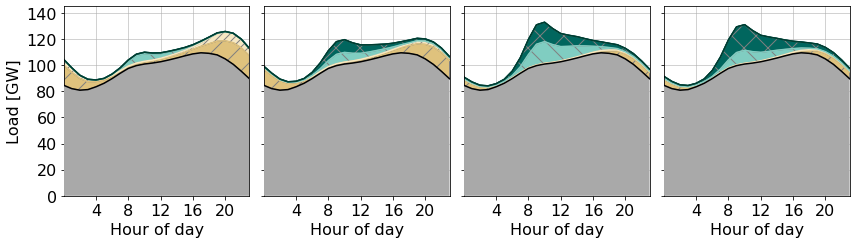

In [72]:
baseline_across([load1, load2, load3, load4],  mean_weekday=mean_weekday, 
                titles1=['Universal Home Access', 'High Home Access', 'Low Home, High Work Access', 'Low Home, Low Work Access'], titles2=['with Midnight Timers', 'with 9pm Timers', 'with Max(Solar) Work Control', 'with Min(Peak) Work Control'])

In [58]:
def plot_stack_multiple_threes_v2(pair1, pair2, pair3, pair4, bauwd, control_list, diff_ylim=34, yticks=[0, 5, 10, 15, 20, 25, 30]):
    
    colors = {'Residential L2': '#dfc27d', 'MUD L2': '#f6e8c3', 'Workplace L2': '#80cdc1', 'Public L2': '#01665e', 'Public DCFC': '#003c30'}
    legend_rename = {key:key for key in colors.keys()}
    legend_rename['Residential L2'] = 'SFH L2'
    scenario_names=['Universal Home Access', 'Base Case Access', 'Low Home, High Work Access', 'Low Home, Low Work Access']
    patterns = ['/', '///', '\\', 'x', '.', '*']

    fig, ax = plt.subplots(3, 5, figsize=(14, 9), gridspec_kw={})
    
    pair_axes = {0:[ax[0, 0], ax[0, 1]], 1:[ax[0, 2], ax[0, 3]], 2:[ax[1, 0], ax[1, 1]], 3:[ax[1, 2], ax[1, 3]]}
    for j, pair_set in enumerate([pair1, pair2, pair3, pair4]):
        for k in range(2):
            baseline = np.zeros((1440, ))
            for i, key in enumerate(pair_set[k].columns[1:]):
                pair_axes[j][k].plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*pair_set[k][key].values, color=colors[key])
                pair_axes[j][k].fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*pair_set[k][key].values, hatch=patterns[i], facecolor=colors[key], label=legend_rename[key], edgecolor='grey')
                baseline += (1/1000)*(1/1000)*pair_set[k][key].values
            pair_axes[j][k].set_xlim([0, 24])
            pair_axes[j][k].set_xticks([0, 4, 8, 12, 16, 20])
            pair_axes[j][k].set_xticklabels([])
            pair_axes[j][k].set_ylim([0, diff_ylim])
            pair_axes[j][k].set_yticks(yticks)
            pair_axes[j][k].set_yticklabels([])

            pair_axes[j][k].set_axisbelow(True)        
            pair_axes[j][k].grid(alpha=0.7)

    baseline = np.zeros((1440, ))
    for i, key in enumerate(bauwd.columns[1:]):
        ax[0, 4].plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*bauwd[key].values, color=colors[key])
        ax[0, 4].fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*bauwd[key].values, hatch=patterns[i], facecolor=colors[key], label=key, edgecolor='grey')
        baseline += (1/1000)*(1/1000)*bauwd[key].values
    ax[0, 4].set_xlim([0, 24])
    ax[0, 4].set_xticks([0, 4, 8, 12, 16, 20])
    ax[0, 4].set_xticklabels([])
    ax[0, 4].set_ylim([0, diff_ylim])
    ax[0, 4].set_yticks(yticks)
    ax[0, 4].set_yticklabels([])
    ax[0, 4].set_axisbelow(True)        
    ax[0, 4].grid(alpha=0.7)
    
            
    for j, test3 in enumerate(control_list):
        baseline = np.zeros((1440, ))
        for i, key in enumerate(test3.columns[1:]):
            ax[2, j].plot((1/60)*np.arange(0, 1440), baseline+(1/1000)*(1/1000)*test3[key].values, color=colors[key])
            ax[2, j].fill_between((1/60)*np.arange(0, 1440), baseline, baseline+(1/1000)*(1/1000)*test3[key].values, hatch=patterns[i], facecolor=colors[key], label=key, edgecolor='grey')
            baseline += (1/1000)*(1/1000)*test3[key].values
        ax[2, j].set_xlim([0, 24])
        ax[2, j].set_xticks([0, 4, 8, 12, 16, 20])
        ax[2, j].set_xticklabels([])
        ax[2, j].set_ylim([0, diff_ylim])
        ax[2, j].set_yticks(yticks)
        ax[2, j].set_yticklabels([])
        ax[2, j].set_axisbelow(True)        
        ax[2, j].grid(alpha=0.7)

        
    ax[1, 4].set_axis_off()

    for j in range(3):
        ax[j, 0].set_ylabel('Load [GW]', fontsize=16)
        ax[j, 0].set_yticklabels(yticks, fontsize=16)
    for j in range(5):
        ax[2, j].set_xlabel('Hour of day', fontsize=16)
        ax[2, j].set_xticklabels([0, 4, 8, 12, 16, 20], fontsize=16)
        
    plt.tight_layout()
    plt.savefig('Figure1_unlabeled_100p_v3.pdf', bbox_inches='tight')
    plt.show()

In [39]:
colors = {'Residential L2': '#dfc27d', 'MUD L2': '#f6e8c3', 'Workplace L2': '#80cdc1', 'Public L2': '#01665e', 'Public DCFC': '#003c30'}
legend_rename = {key:key for key in colors.keys()}

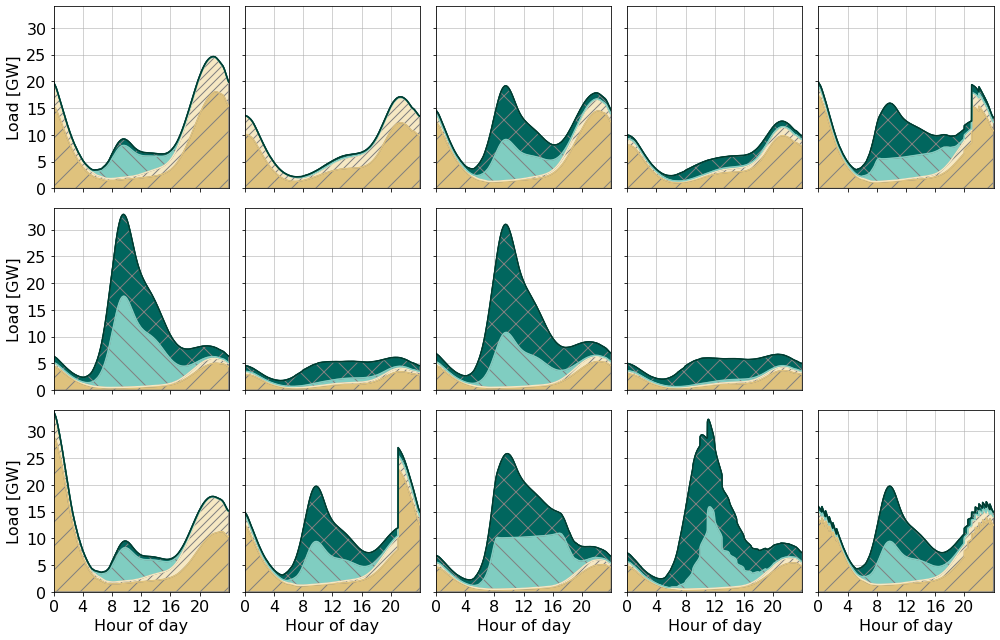

In [59]:
plot_stack_multiple_threes_v2([load1, load12], [load2, load22], [load3, load32], [load4, load42], load9, [load5, load6, load7, load8, load0])
